# Step 3: Preparing data for training

Objectives

- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph


In [7]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder


In [8]:
with open('hdfcdaily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')

dfSentiment['date'] = dfSentiment['date'].dt.strftime('%Y-%m-%d')
dfSentiment['jsonDate'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')
dfSentiment['jsonDate'] = dfSentiment['jsonDate'].dt.strftime('%Y-%m-%d')


dfSentiment.head()

,jsonDate,sentiment,date
0,2011-01-04,"[0.14239197969436646, 0.19975623488426208, 0.3...",2011-01-04
1,2011-01-07,"[0.181715190410614, 0.17870093882083893, 0.287...",2011-01-07
2,2011-01-08,"[0.1972026526927948, 0.19367334246635437, 0.29...",2011-01-08
3,2011-01-10,"[0.06704159826040268, 0.13708177208900452, 0.3...",2011-01-10
4,2011-01-11,"[0.212809756398201, 0.19509904086589813, 0.286...",2011-01-11


### 3.2. Importing daily stock data from stock folder

- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well


In [9]:
#csvFilePath = 'M:\miniproject\HDFCBANK_2013-01-01_to_2024_01-01.csv'
dfCsv = pd.read_csv("HDFCBANK_2013-01-01_to_2024_01-01.csv")
dfCsv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,341.049988,342.549988,339.825012,342.250000,315.591278,2014606
1,2013-01-02,344.950012,345.000000,341.524994,343.674988,316.905273,4854798
2,2013-01-03,345.000000,345.000000,340.200012,341.674988,315.061096,4571366
3,2013-01-04,342.500000,342.500000,336.399994,339.674988,313.216888,5442254
4,2013-01-07,341.850006,341.850006,333.000000,334.100006,308.076141,5502284


### 3.3. Merge both the imported data with date


In [10]:
'''dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])#puting 0,0,0,0,0 if sentiment is not present
#dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: [0, 0, 0, 0, 0] if pd.isnan(x) else x)
#print(dfMerged['sentiment'].head(20))
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)
#dfMerged.to_csv('merged_data.csv', index=False)
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])
dfMerged.head(10)'''
# Convert 'Date' column in dfCsv to datetime
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

# Convert 'date' column in dfSentiment to datetime
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'], format='%Y-%m-%d')

# Merge dfCsv and dfSentiment on 'date'
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Replace non-list values in 'sentiment' with [0, 0, 0, 0, 0]
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])

# Split 'sentiment' list into separate columns
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])

# Concatenate dfMerged and dfSentimentColumns
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# Drop unnecessary columns
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])

dfMerged.to_csv('hdfc_merged.csv', index=False)
# Display the first 10 rows of dfMerged
dfMerged.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2013-01-01,341.049988,342.549988,339.825012,342.250000,315.591278,2014606,0.086186,0.153239,0.291867,0.288301,0.180407
1,2013-01-02,344.950012,345.000000,341.524994,343.674988,316.905273,4854798,0.090895,0.110481,0.218977,0.285420,0.294228
2,2013-01-03,345.000000,345.000000,340.200012,341.674988,315.061096,4571366,0.000000,0.000000,0.000000,0.000000,0.000000
3,2013-01-04,342.500000,342.500000,336.399994,339.674988,313.216888,5442254,0.000000,0.000000,0.000000,0.000000,0.000000
4,2013-01-07,341.850006,341.850006,333.000000,334.100006,308.076141,5502284,0.060283,0.096310,0.246747,0.332668,0.263992
5,2013-01-08,334.000000,336.700012,332.850006,335.125000,309.021271,4942598,0.203983,0.267096,0.294708,0.155776,0.078437
6,2013-01-09,336.000000,336.274994,333.024994,333.750000,307.753418,6435982,0.186889,0.176456,0.271999,0.201140,0.163516
7,2013-01-10,334.750000,339.000000,333.250000,337.899994,311.580078,4565184,0.138032,0.183592,0.294046,0.225440,0.158890
8,2013-01-11,338.450012,338.450012,333.350006,334.649994,308.583221,5141714,0.221462,0.279878,0.296625,0.129819,0.072216
9,2013-01-14,334.075012,335.250000,333.549988,334.649994,308.583221,5694874,0.000000,0.000000,0.000000,0.000000,0.000000


### 3.4. Saving the merged data

- Saving the file in CSV format ((hdfc_merged.csv))


In [15]:
outputCsvPath = 'hdfc_merged.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph


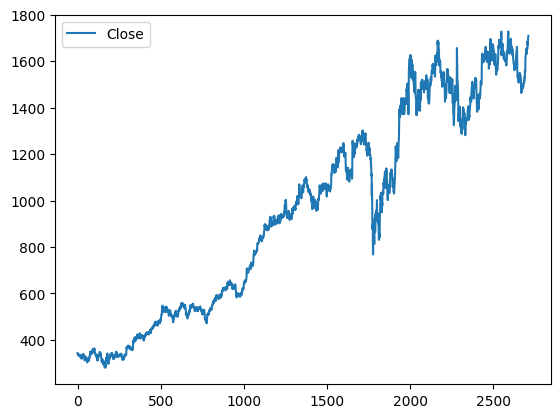

In [12]:
dfMerged[['Close']].plot()
plt.show()